In [ ]:
#############################################################
# Matthew Hughes
# 
# Converting Physionet 109 Subject Data into BIDs format
#############################################################

In [1]:
# Not needed, just for clearing new BIDs directory if it exists
import os.path as op
import shutil

# Work with and manipulate EEG data, load the dataset
import mne
from mne.datasets import eegbci

# Library that will convert files to bids format
from mne_bids import BIDSPath, print_dir_tree, write_raw_bids
from mne_bids.stats import count_events

In [2]:
# Downlaod the data from the mne datasets
runs = [1,2]
path = '../datasets'

for i in range(1,110):
    eegbci.load_data(subject=i, runs=runs, path=path, update_path=True)

In [3]:
# Display the directory after files have been installed
mne_data_dir = mne.get_config('MNE_DATASETS_EEGBCI_PATH')
data_dir = op.join(mne_data_dir, 'MNE-eegbci-data')

print_dir_tree(data_dir)

|MNE-eegbci-data\
|--- files\
|------ eegmmidb\
|--------- 1.0.0\
|------------ S001\
|--------------- S001R01.edf
|--------------- S001R02.edf
|------------ S002\
|--------------- S002R01.edf
|--------------- S002R02.edf
|------------ S003\
|--------------- S003R01.edf
|--------------- S003R02.edf
|------------ S004\
|--------------- S004R01.edf
|--------------- S004R02.edf
|------------ S005\
|--------------- S005R01.edf
|--------------- S005R02.edf
|------------ S006\
|--------------- S006R01.edf
|--------------- S006R02.edf
|------------ S007\
|--------------- S007R01.edf
|--------------- S007R02.edf
|------------ S008\
|--------------- S008R01.edf
|--------------- S008R02.edf
|------------ S009\
|--------------- S009R01.edf
|--------------- S009R02.edf
|------------ S010\
|--------------- S010R01.edf
|--------------- S010R02.edf
|------------ S011\
|--------------- S011R01.edf
|--------------- S011R02.edf
|------------ S012\
|--------------- S012R01.edf
|--------------- S012R02.ed

In [4]:
# Display list of built in mne montages
mne.channels.get_builtin_montages()

['standard_1005',
 'standard_1020',
 'standard_alphabetic',
 'standard_postfixed',
 'standard_prefixed',
 'standard_primed',
 'biosemi16',
 'biosemi32',
 'biosemi64',
 'biosemi128',
 'biosemi160',
 'biosemi256',
 'easycap-M1',
 'easycap-M10',
 'easycap-M43',
 'EGI_256',
 'GSN-HydroCel-32',
 'GSN-HydroCel-64_1.0',
 'GSN-HydroCel-65_1.0',
 'GSN-HydroCel-128',
 'GSN-HydroCel-129',
 'GSN-HydroCel-256',
 'GSN-HydroCel-257',
 'mgh60',
 'mgh70',
 'artinis-octamon',
 'artinis-brite23',
 'brainproducts-RNP-BA-128']

In [9]:
# Load the data for the first run(eye's open),
# then set the montage for the data
raws = []
montage = mne.channels.make_standard_montage('standard_1005')

for i in range(1,110):
    edf_path = eegbci.load_data(subject=i, runs=1)[0] # Get path
    raw = mne.io.read_raw_edf(edf_path, preload=False) # Load raw data, no preloading
    eegbci.standardize(raw) # Standardize channel names
    raw.set_montage(montage) # Set the montage
    raws.append(raw)

Extracting EDF parameters from C:\Users\baseb\Documents\CodingResearch\BiometricAuthentication\CSCE-Independent-Study\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\baseb\Documents\CodingResearch\BiometricAuthentication\CSCE-Independent-Study\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S002\S002R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\baseb\Documents\CodingResearch\BiometricAuthentication\CSCE-Independent-Study\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S003\S003R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Extracting EDF parameters from C:\Users\baseb\Documents\CodingResearch\BiometricAuthentication\CSCE-Independent-Study\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S004\S004R01.edf...
EDF file detect

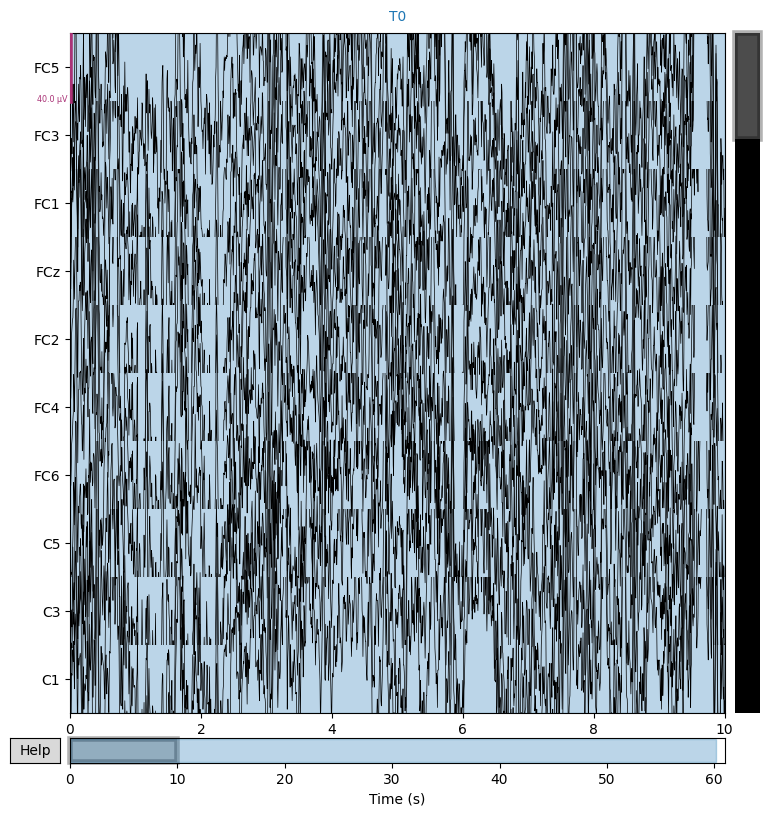

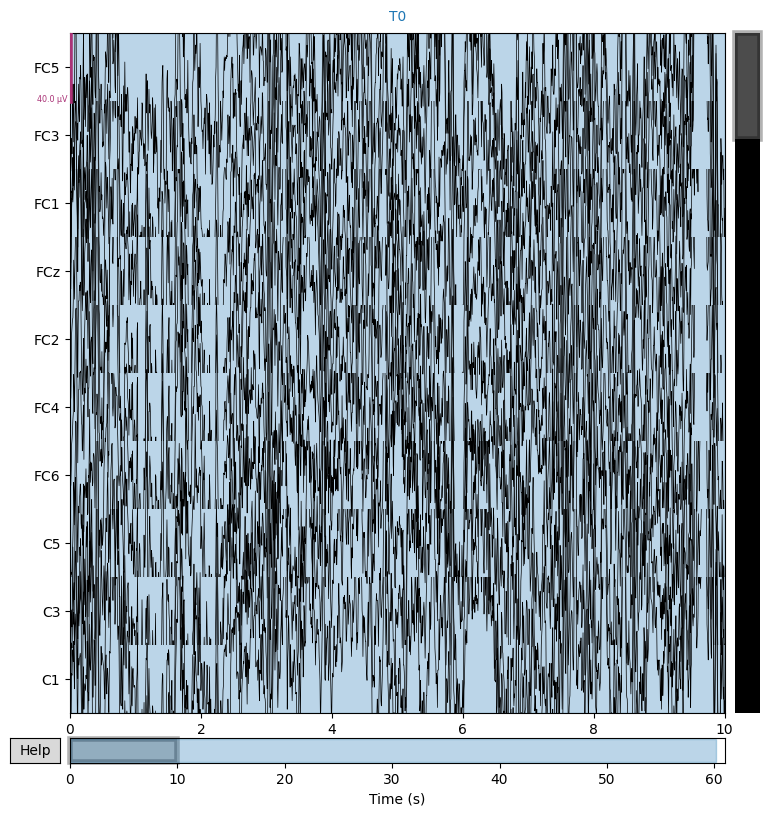

In [11]:
raws[0].plot(n_channels=10)

In [10]:
# Meta data for bids path
task = 'RestEyesOpen'
bids_root = op.join('../datasets', 'Bids_PhysioNet_109')

# Remove the directory before creating a new one
if op.exists(bids_root):
    shutil.rmtree(bids_root)

In [11]:
# For all existing files, save the bids
for i,raw in enumerate(raws):
    bids_path = BIDSPath(subject=f'{(i+1):03}', task=task, root=bids_root)
    write_raw_bids(raw, bids_path, overwrite=True)

Extracting EDF parameters from C:\Users\baseb\Documents\CodingResearch\BiometricAuthentication\CSCE-Independent-Study\datasets\MNE-eegbci-data\files\eegmmidb\1.0.0\S001\S001R01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Writing '..\datasets\Bids_PhysioNet_109\README'...
Writing '..\datasets\Bids_PhysioNet_109\participants.tsv'...
Writing '..\datasets\Bids_PhysioNet_109\participants.json'...
Writing '../datasets/Bids_PhysioNet_109/sub-001/eeg/sub-001_space-CapTrak_electrodes.tsv'...
Writing '../datasets/Bids_PhysioNet_109/sub-001/eeg/sub-001_space-CapTrak_coordsystem.json'...
The provided raw data contains annotations, but you did not pass an "event_id" mapping from annotation descriptions to event codes. We will generate arbitrary event codes. To specify custom event codes, please pass "event_id".
Used Annotations descriptions: ['T0']
Writing '..\datasets\Bids_PhysioNet_109\sub-001\eeg\sub-001_task-RestEyesOpen_events.tsv'...
Writing '..\d

In [12]:
# Print the BIDs tree
print_dir_tree(bids_root)

|Bids_PhysioNet_109\
|--- README
|--- dataset_description.json
|--- participants.json
|--- participants.tsv
|--- sub-001\
|------ sub-001_scans.tsv
|------ eeg\
|--------- sub-001_space-CapTrak_coordsystem.json
|--------- sub-001_space-CapTrak_electrodes.tsv
|--------- sub-001_task-RestEyesOpen_channels.tsv
|--------- sub-001_task-RestEyesOpen_eeg.edf
|--------- sub-001_task-RestEyesOpen_eeg.json
|--------- sub-001_task-RestEyesOpen_events.json
|--------- sub-001_task-RestEyesOpen_events.tsv
|--- sub-002\
|------ sub-002_scans.tsv
|------ eeg\
|--------- sub-002_space-CapTrak_coordsystem.json
|--------- sub-002_space-CapTrak_electrodes.tsv
|--------- sub-002_task-RestEyesOpen_channels.tsv
|--------- sub-002_task-RestEyesOpen_eeg.edf
|--------- sub-002_task-RestEyesOpen_eeg.json
|--------- sub-002_task-RestEyesOpen_events.json
|--------- sub-002_task-RestEyesOpen_events.tsv
|--- sub-003\
|------ sub-003_scans.tsv
|------ eeg\
|--------- sub-003_space-CapTrak_coordsystem.json
|--------- 